# Monte Carlo Simulation
Making a function that simulates grocery store sales

# Average grocery visit cost and number of visitors 
    
According to: https://www.foxbusiness.com/lifestyle/what-is-the-average-grocery-bill-for-one-person
The average grocery monthly bill is between 165 and 345 the average person going twice a month so we will divide 255 by 2 so 127$ will be the average visit cost.

According to: https://www.quora.com/What-is-the-average-foot-traffic-at-a-local-grocery-store
Even small stores get 2000 visitors a day we will be a slightly bigger store at 4000 per day average
 


In [3]:
import numpy as np
import pandas as pd
import random

# Simulate average visitors per day, avg margin per day and average amount spend per day per person
This assumes that each day people will buy a varying amount and types of products leading to various margins

In [4]:
#Simulate normal distribution of visitors with average amount of visitors is 4000 transactions per day
avg_customer = 4000 
std_dev = avg_customer * .10 # 10% standard deviation of average visitor amount for simplicity
num_days = 365


# Get variables needed to calculate the random margin
avg_margin = .0275 
std_dev_m = avg_margin * .10 # 10% standard deviation of average visitor amount for simplicity
num_dayz = 365

# Get random distribution for amount the average customer spends each day.
avg_spend = 127.5 
std_dev_s = avg_spend * .10 # 10% standard deviation of average visitor amount for simplicity
num_dayz2 = 365

In [5]:
# Simulating random number of visitors for a whole year.....
visitors = np.random.normal(avg_customer, std_dev, num_days).round(2)
margin = np.random.normal(avg_margin, std_dev_m, num_dayz)
spend = np.random.normal(avg_spend, std_dev_s, num_dayz2)

# Calculate Revenue 

In [6]:
df = pd.DataFrame(index=range(num_days), data={'num_visitors': visitors,
                                               'margin': margin,
                                               'spent': spend})

In [7]:
# Calculate the revenue, total proft and expenses 1- profit
df['revenue'] = df['num_visitors'] * df['spent'] # Calculate the total revenue
df['expenses'] = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
df['profit'] = df['revenue'] * df['margin'] # Calculate the profit
df.head()

,num_visitors,margin,spent,revenue,expenses,profit
0,3884.18,0.027763,114.118995,443258.718584,430952.467190,12306.251394
1,3521.67,0.028724,130.015580,457871.967552,444720.214228,13151.753324
2,4341.67,0.029232,139.638107,606262.581220,588540.089164,17722.492056
3,3748.28,0.026805,114.448666,428985.647053,417486.820721,11498.826332
4,4016.91,0.030407,121.454535,487871.935582,473037.335439,14834.600143


# SIMULATION NOW 

In [8]:
#Simulate normal distribution of visitors with average amount of visitors is 4000 transactions per day
avg_customer = 4000 
std_dev = avg_customer * .10 # 10% standard deviation of average visitor amount for simplicity
num_days = 365

# Get variables needed to calculate the random margin
avg_margin = .0275 
std_dev_m = avg_margin * .10 # 10% standard deviation of average visitor amount for simplicity

# Get random distribution for amount the average customer spends each day.
avg_spend = 127.5 
std_dev_s = avg_spend * .10 # 10% standard deviation of average visitor amount for simplicity

# Num_days * 2 is the number of days (number of rows we simulate grocery activity)

In [13]:
# Change this variable to decide number of rows(or days)
num_days = 365 # This number will get multiplied by 2 to simulate number of rows
# This will simulate 2 years or 365 *2

In [16]:
# df2 is empty dataframe to hold data
df2= pd.DataFrame

# simulations
num_simulations = 100

# list to keep all the results from each simulation 
profit_total = []

# Loop through many simulations
for i in range(num_simulations):
    # Simulating random visitors, average margin and spend per day for the store
    visitors = np.random.normal(avg_customer, std_dev, num_days).round(2)
margin = np.random.normal(avg_margin, std_dev_m, num_days)
spend = np.random.normal(avg_spend, std_dev_s, num_days)

df = pd.DataFrame(index=range(num_days), data={'num_visitors': visitors,
                                               'margin': margin,
                                               'spent': spend})
    
    # Calculate the revenue, total proft and expenses 1- profit
df['revenue'] = df['num_visitors'] * df['spent'] # Calculate the total revenue
df['expenses'] = df['revenue'] * (1- df['margin']) # Calculate the cost of buying product
df['profit'] = df['revenue'] * df['margin'] # Calculate the profit

df2 = df.append(df) # append a second way..........................

  # We want to track the total revenue expenses and profit
profit_total.append([df['revenue'].sum().round(0),
                      df['expenses'].sum().round(0),
                      df['profit'].sum().round(0)])

In [17]:
df2.describe()

,num_visitors,margin,spent,revenue,expenses,profit
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4014.114521,0.027775,126.615028,508419.373239,494288.979657,14130.393582
std,398.022437,0.002606,12.283889,72442.081498,70370.005390,2485.399796
min,2167.290000,0.019440,83.920719,295700.487332,286762.932623,8252.896496
25%,3760.810000,0.025991,118.412697,458339.588280,445612.319360,12402.880334
50%,4024.190000,0.027712,126.655932,502968.821848,488737.049592,13934.662330
75%,4263.660000,0.029466,135.586054,556177.667807,538889.240046,15655.661319
max,5151.760000,0.035580,161.517397,724741.480637,698955.443996,25786.036641


Text(0, 0.5, 'Frequency')

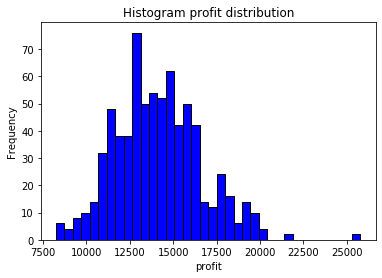

In [18]:
# matplotlib histogram
import matplotlib.pyplot as plt
plt.hist(df2['profit'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram profit distribution')
plt.xlabel('profit')
plt.ylabel('Frequency')

In [23]:
df2.head()

,num_visitors,margin,spent,revenue,expenses,profit
0,3302.89,0.027476,124.739533,412000.956264,400680.918228,11320.038036
1,4053.46,0.028398,120.448756,488234.214435,474369.575463,13864.638973
2,3227.67,0.029144,118.041375,380998.605302,369894.917120,11103.688182
3,4196.75,0.027782,111.642459,468535.488553,455518.578212,13016.910341
4,4376.62,0.029441,119.903538,524772.220911,509322.368424,15449.852487


In [29]:
df2['cumsum_profit']= df2['profit'].cumsum().round(2)
df2['cumsum_revenue']= df2['revenue'].cumsum().round(2)
df2['cumsum_expenses']= df2['expenses'].cumsum().round(2)
df2['days'] = np.arange(len(df2))

df2.head()

,num_visitors,margin,spent,revenue,expenses,profit,cumsum_profit,cumsum_revenue,cumsum_expenses,days
0,3302.89,0.027476,124.739533,412000.956264,400680.918228,11320.038036,11320.04,412000.96,400680.92,0
1,4053.46,0.028398,120.448756,488234.214435,474369.575463,13864.638973,25184.68,900235.17,875050.49,1
2,3227.67,0.029144,118.041375,380998.605302,369894.917120,11103.688182,36288.37,1281233.78,1244945.41,2
3,4196.75,0.027782,111.642459,468535.488553,455518.578212,13016.910341,49305.28,1749769.26,1700463.99,3
4,4376.62,0.029441,119.903538,524772.220911,509322.368424,15449.852487,64755.13,2274541.49,2209786.36,4


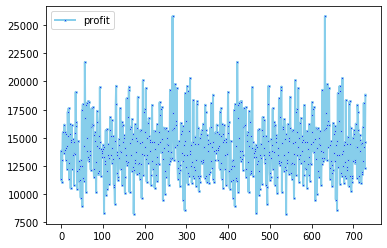

In [46]:
# multiple line plot
plt.plot( 'days', 'profit', data=df2, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2)
plt.legend()

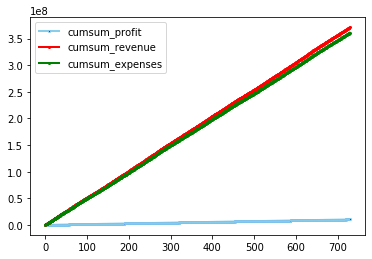

In [47]:
# multiple line plot
plt.plot( 'days', 'cumsum_profit', data=df2, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2)
plt.plot( 'days', 'cumsum_revenue', data=df2, marker='o', markerfacecolor='red', markersize=2, color='red', linewidth=2)
plt.plot( 'days', 'cumsum_expenses', data=df2, marker='o', markerfacecolor='green', markersize=2, color='green', linewidth=2)
plt.legend()


# Alot of expenses and revenue but thats also alot of profit!